In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [118]:
df = pd.read_csv('..\\..\\datasets\\house-prices.csv', na_values=['missing', 'xx', '?', 'x', '-'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [119]:
df['country'].unique()

array(['USA'], dtype=object)

In [120]:
len(df['street'].unique())

4525

In [121]:
df['statezip'].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [122]:
df.drop(['country', 'street'], axis=1, inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178


In [123]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df.drop('date', axis=1, inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,day,month
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,2,5
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,2,5
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,2,5
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,2,5
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133,9,7
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007,9,7
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059,9,7
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178,10,7


In [124]:
zero_prices_indecies = df[df['price'] == 0].index.tolist()
outliers = detect_outliers(df, 0, ['price'])
outliers = outliers + zero_prices_indecies
df.drop(outliers, inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,day,month
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,2,5
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,2,5
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,2,5
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,2,5
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle,WA 98115,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133,9,7
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007,9,7
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059,9,7
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178,10,7


In [125]:
df.bedrooms.value_counts()

3.0    1981
4.0    1394
2.0     557
5.0     282
6.0      47
1.0      37
7.0      10
0.0       1
9.0       1
8.0       1
Name: bedrooms, dtype: int64

In [126]:
df = df[(df['bedrooms'] > 0) & (df['bedrooms'] < 8)]
df['bedrooms'] = df['bedrooms'].astype(int)
df

C:\Users\moham\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,day,month
0,313000.000000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,2,5
2,342000.000000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,2,5
3,420000.000000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,2,5
4,550000.000000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,2,5
5,490000.000000,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle,WA 98115,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133,9,7
4596,534333.333333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007,9,7
4597,416904.166667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059,9,7
4598,203400.000000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178,10,7


In [127]:
df.bedrooms.unique()

array([3, 4, 2, 5, 6, 1, 7])

In [128]:
df['bathrooms'] = df['bathrooms'].astype(int)
df['bathrooms'].unique()

C:\Users\moham\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1, 2, 3, 4, 5, 0])

<AxesSubplot:>

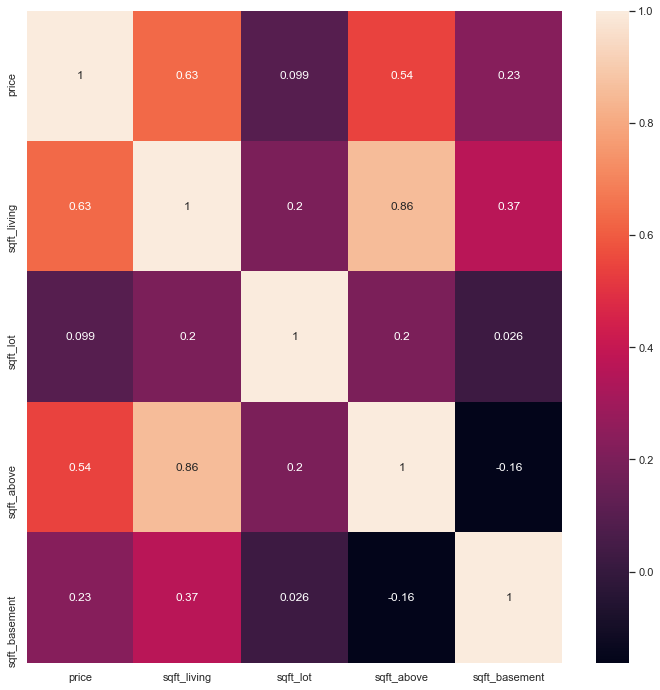

In [129]:
sns.heatmap(df[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]].corr(), annot=True)

In [130]:
df.drop(["sqft_lot", "sqft_above", "sqft_basement"], axis=1, inplace=True)
df

C:\Users\moham\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,yr_built,yr_renovated,city,statezip,day,month
0,313000.000000,3,1,1340,1.5,0,0,3,1955,2005,Shoreline,WA 98133,2,5
2,342000.000000,3,2,1930,1.0,0,0,4,1966,0,Kent,WA 98042,2,5
3,420000.000000,3,2,2000,1.0,0,0,4,1963,0,Bellevue,WA 98008,2,5
4,550000.000000,4,2,1940,1.0,0,0,4,1976,1992,Redmond,WA 98052,2,5
5,490000.000000,2,1,880,1.0,0,0,3,1938,1994,Seattle,WA 98115,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3,1,1510,1.0,0,0,4,1954,1979,Seattle,WA 98133,9,7
4596,534333.333333,3,2,1460,2.0,0,0,3,1983,2009,Bellevue,WA 98007,9,7
4597,416904.166667,3,2,3010,2.0,0,0,3,2009,0,Renton,WA 98059,9,7
4598,203400.000000,4,2,2090,1.0,0,0,3,1974,0,Seattle,WA 98178,10,7


In [131]:
df['floors'] = df['floors'].astype(int)
df

C:\Users\moham\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,yr_built,yr_renovated,city,statezip,day,month
0,313000.000000,3,1,1340,1,0,0,3,1955,2005,Shoreline,WA 98133,2,5
2,342000.000000,3,2,1930,1,0,0,4,1966,0,Kent,WA 98042,2,5
3,420000.000000,3,2,2000,1,0,0,4,1963,0,Bellevue,WA 98008,2,5
4,550000.000000,4,2,1940,1,0,0,4,1976,1992,Redmond,WA 98052,2,5
5,490000.000000,2,1,880,1,0,0,3,1938,1994,Seattle,WA 98115,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3,1,1510,1,0,0,4,1954,1979,Seattle,WA 98133,9,7
4596,534333.333333,3,2,1460,2,0,0,3,1983,2009,Bellevue,WA 98007,9,7
4597,416904.166667,3,2,3010,2,0,0,3,2009,0,Renton,WA 98059,9,7
4598,203400.000000,4,2,2090,1,0,0,3,1974,0,Seattle,WA 98178,10,7


<AxesSubplot:>

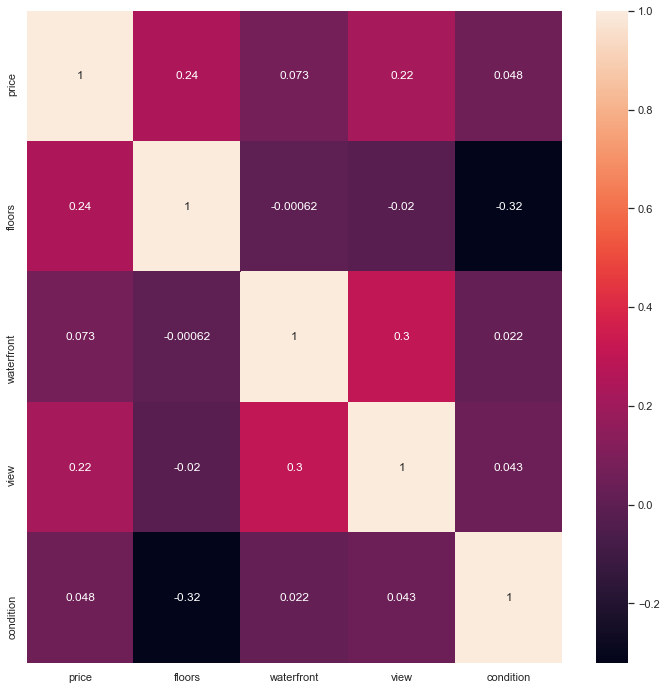

In [132]:
sns.heatmap(df[["price", "floors", "waterfront", "view", "condition"]].corr(), annot=True)

In [133]:
df.drop(['waterfront', 'condition'], axis=1, inplace=True)
df

C:\Users\moham\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price,bedrooms,bathrooms,sqft_living,floors,view,yr_built,yr_renovated,city,statezip,day,month
0,313000.000000,3,1,1340,1,0,1955,2005,Shoreline,WA 98133,2,5
2,342000.000000,3,2,1930,1,0,1966,0,Kent,WA 98042,2,5
3,420000.000000,3,2,2000,1,0,1963,0,Bellevue,WA 98008,2,5
4,550000.000000,4,2,1940,1,0,1976,1992,Redmond,WA 98052,2,5
5,490000.000000,2,1,880,1,0,1938,1994,Seattle,WA 98115,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3,1,1510,1,0,1954,1979,Seattle,WA 98133,9,7
4596,534333.333333,3,2,1460,2,0,1983,2009,Bellevue,WA 98007,9,7
4597,416904.166667,3,2,3010,2,0,2009,0,Renton,WA 98059,9,7
4598,203400.000000,4,2,2090,1,0,1974,0,Seattle,WA 98178,10,7


<AxesSubplot:>

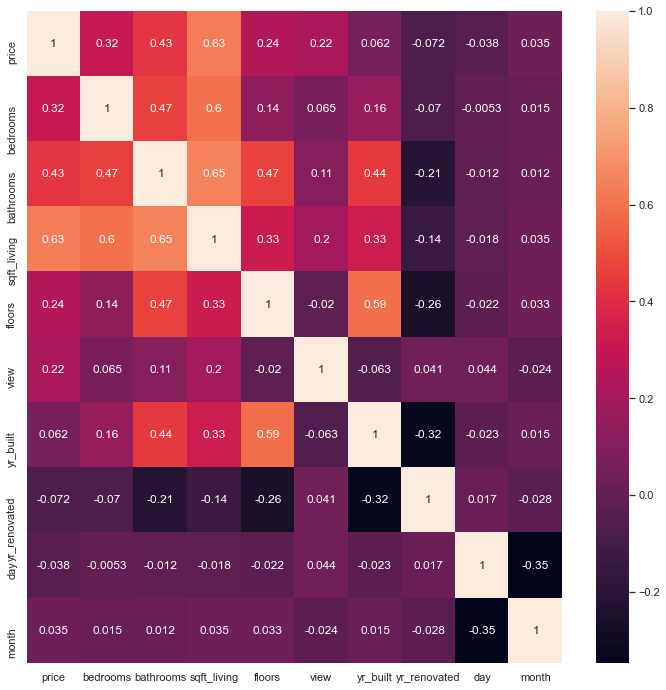

In [134]:
sns.set(rc={"figure.figsize":(12, 12)})
sns.heatmap(df.corr(), annot=True)

In [135]:
df.drop(['yr_renovated', 'day'], axis=1, inplace=True)
df

C:\Users\moham\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price,bedrooms,bathrooms,sqft_living,floors,view,yr_built,city,statezip,month
0,313000.000000,3,1,1340,1,0,1955,Shoreline,WA 98133,5
2,342000.000000,3,2,1930,1,0,1966,Kent,WA 98042,5
3,420000.000000,3,2,2000,1,0,1963,Bellevue,WA 98008,5
4,550000.000000,4,2,1940,1,0,1976,Redmond,WA 98052,5
5,490000.000000,2,1,880,1,0,1938,Seattle,WA 98115,5
...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3,1,1510,1,0,1954,Seattle,WA 98133,7
4596,534333.333333,3,2,1460,2,0,1983,Bellevue,WA 98007,7
4597,416904.166667,3,2,3010,2,0,2009,Renton,WA 98059,7
4598,203400.000000,4,2,2090,1,0,1974,Seattle,WA 98178,7


In [136]:
df = pd.get_dummies(df, columns=['city', 'statezip'], drop_first=True)

In [137]:
df

,price,bedrooms,bathrooms,sqft_living,floors,view,yr_built,month,city_Auburn,city_Beaux Arts Village,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.000000,3,1,1340,1,0,1955,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,342000.000000,3,2,1930,1,0,1966,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.000000,3,2,2000,1,0,1963,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.000000,4,2,1940,1,0,1976,5,0,0,...,0,0,0,0,0,0,0,0,0,0
5,490000.000000,2,1,880,1,0,1938,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3,1,1510,1,0,1954,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4596,534333.333333,3,2,1460,2,0,1983,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,416904.166667,3,2,3010,2,0,2009,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,203400.000000,4,2,2090,1,0,1974,7,0,0,...,0,0,0,0,1,0,0,0,0,0


In [138]:
df.isna().sum()

price                0
bedrooms             0
bathrooms            0
sqft_living          0
floors               0
                    ..
statezip_WA 98188    0
statezip_WA 98198    0
statezip_WA 98199    0
statezip_WA 98288    0
statezip_WA 98354    0
Length: 127, dtype: int64

In [139]:
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(f"{x.shape} || {y.shape}")
print(f"{x_train.shape} || {x_test.shape} || {y_train.shape} || {y_test.shape}")

(4308, 126) || (4308,)
(3231, 126) || (1077, 126) || (3231,) || (1077,)


In [140]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [142]:
models = {
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
}

In [143]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')
    print('-----------------------------------------------------------')

Using model: LinearRegression
RMSE: 106190.32686403138
R2 Score: 0.7683842436300109
-----------------------------------------------------------
Using model: KNeighborsRegressor
RMSE: 123806.87683256784
R2 Score: 0.6851615820608559
-----------------------------------------------------------
Using model: SVR
RMSE: 223841.17934534248
R2 Score: -0.029148761351376118
-----------------------------------------------------------
Using model: DecisionTreeRegressor
RMSE: 152424.73085128862
R2 Score: 0.5227905242209023
-----------------------------------------------------------
Using model: RandomForestRegressor
RMSE: 113272.77012956279
R2 Score: 0.7364583698103866
-----------------------------------------------------------
Using model: XGBRegressor
RMSE: 104676.68600951055
R2 Score: 0.7749401036527784
-----------------------------------------------------------


In [146]:
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

RMSE: 104676.68600951055
R2 Score: 0.7749401036527784


In [147]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']